# Customer Data Pre-processing
## Name - Pratik Dadasaheb Takudage
## Student ID: 202309160

## Importing Liabraries for Data Processing & Data Visualisation

In [4]:
import csv
import json
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Processing

### Task - 1 
Reading the CSV file **acw_user_data.csv**.

In [5]:
# Step-1 Opening the CSV file & reading it in as list of dictionaries.

with open("acw_user_data.csv", mode="r") as user_data:
    csv_reader= csv.DictReader(user_data)
    raw_user_data=[row for row in csv_reader]

### Task - 2
Conversion of all flat structures into nested structures.

In [6]:
# Step-2 Conversion of all flat structures into nested structures.

customer_details=[]                                          # Creating empty list to append all the nested structure data

for row in raw_user_data:
        
## Below code will convert data from flat structure to nested structure and will append to "customer_details" list
    
    customer_details.append(                                 #Appending dictionary and sub-dictionaries into empty list
    { 
        'First Name': row['First Name'],
        'Last Name': row['Last Name'],
        'Age (Years)': row['Age (Years)'],
        'Sex': row['Sex'],
        'Retired': row['Retired'],
        'Marital Status': row['Marital Status'],
        'Dependants': row['Dependants'],
        'Salary (GBP)': row['Yearly Salary (GBP)'],
        'Pension (GBP)': row['Yearly Pension (GBP)'],
        'Company': row['Employer Company'],
        'Commuted Distance(miles)': row['Distance Commuted to Work (miles)']
     ,                   
    
    'Vehicle': {
        'Make': row['Vehicle Make'],
        'Model': row['Vehicle Model'],
        'Year': row['Vehicle Year'],
        'Type': row['Vehicle Type']
    },
    
    'Credit_Card': {
       'Start Date': row['Credit Card Start Date'],
       'Expiry Date': row['Credit Card Expiry Date'],
       'Number': row['Credit Card Number'],
       'CVV': row['Credit Card CVV'],
       'IBAN': row['Bank IBAN'] 
    },
    
    'Addresse': {
        'Street': row['Address Street'],
        'City': row['Address City'],
        'Postcode': row['Address Postcode']
    }})


### Task - 3 
1. Resolving the problematic column having empty entries by Replacing 0 at place of empty entries
2. Printing a list where all such error corrections took place
3. Creating **Processed.json** output file & writing all the records into that file

In [7]:
# Step-3 Resolving the problematic column having empty entries

problematic_rows=[]                                        # Created empty list for problematic rows

## Below code will perform the replace operation in places of empty records by assigning "0" and then append the data in "problematic_row" list. 

for i, row in enumerate(customer_details):
    if row["Dependants"]=="" or row["Dependants"]== " " :
        row["Dependants"]= "0"                             # Replacing 0 at place of empty entries
        problematic_rows.append(i)
print("Problematic rows for dependants", problematic_rows) # Printing the list where correction took place  

# Writing all the records into Processed.json file

with open("Processed.json",mode='w') as process_file:      
    process_file.write(json.dumps(customer_details))

Problematic rows for dependants [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


###  Task - 4 
1. Creating two output files **retired.json** & **employed.json** and sorting the data according to the retired and employed customers.
2. Writing all the records into **retired.json** file
3. Writing all the records into **employed.json** file

In [8]:
# Step-4 Seprating data for retired & employed customers

## Below code will run to check "Retired" column and then sorting data into "retired_customer" list & "employed_customer" list

retired_customer=[]                                          # Creating list to append retired customer data
employed_customer=[]                                         # Creating list to append employed customer data

for row in customer_details:
    if row['Retired']== "True":
        retired_customer.append(row)
    elif row['Retired']== "False":
        employed_customer.append(row)

# Writing all the records into retired.json file

with open("retired.json",mode='w') as retired_file:      
    retired_file.write(json.dumps(retired_customer))

# Writing all the records into employed.json file

with open("employed.json",mode='w') as employed_file:      
    employed_file.write(json.dumps(employed_customer))


### Task - 5 
1. Seprating data for customers that have more than 10 years between their start and end date.
2. Creating **remove_ccard.json** output file & writing all the records into that file

In [9]:
# Step-5 Seprating data for customers that have more than 10 years between their start and end date.

## Creating function "flag_credit_card"

def flag_credit_card(customer_details):
    remove_card=[]
    
    for row in customer_details:
        break_Start_date = row['Credit_Card']['Start Date'].split('/')  #Splitting the Start Date into mm & yy
        s_mm = int( break_Start_date[0] )
        s_yy = int( break_Start_date[1] )

        break_expity_date = row['Credit_Card']['Expiry Date'].split('/') #Splitting the Expiry Date into mm & yy
        e_mm = int( break_expity_date[0] )
        e_yy = int( break_expity_date[1] )
        year_difference = (e_yy - s_yy) + (e_mm - s_mm)/12

        if year_difference > 10:
            remove_card.append(row)
        else:
            continue
    return remove_card

# Calling the function "flag_credit_card"
remove_card = flag_credit_card(customer_details)

# Writing all the records into remove_ccard.json file

with open("remove_ccard.json",mode='w') as Ccard_data:      
    Ccard_data.write(json.dumps(remove_card))

### Task - 6 
1. Reading the **"Processed.json"** file
2. Calculating how much customer earns per mile of their commute.
3. Sorting the data in ascending order
4. Creating output file and storing the output data in **“Commute.json”** file

In [10]:
#step 6 (i)Calculating how much customer earns per mile of their commute.
#       (ii)Sorting the data in ascending order
#       (iii)Storing the output data in “Commute.json” file

## Reading the "Processed.json" file

with open('Processed.json', mode='r') as processed_data:
    data=json.load(processed_data)
## Below code will run to check how much customer earns per mile of their commute
for row in data:
    salary_commute = 0.0
    row['Commuted Distance(miles)'] = float(row['Commuted Distance(miles)'])
    row['Salary (GBP)'] = float(row['Salary (GBP)'])
    if row['Commuted Distance(miles)'] <= 1.0:
        row['Salary Commute']= row['Salary (GBP)']
    else:
        salary_commute =  row['Salary (GBP)'] / row['Commuted Distance(miles)']
        row['Salary Commute'] = salary_commute
    
## Below code will sort the records in ascending order

sort_data = sorted(data, key=lambda d: d['Salary Commute'])

# Writing all the records into "commute.json" file

with open("Commute.json",mode='w') as commute_data:
    commute_data.write(json.dumps(sort_data))

## Data Visualisation

### Task - 1
1. Reading the **"acw_user_data.csv"** file with pandas
2. Calculating **mean "Salary"**
3. Calculating **median of "Age"**

In [11]:
# Step-1

## Reading the "acw_user_data.csv" file with pandas
user_data=pd.read_csv("acw_user_data.csv")

# Step-1(a & b) Calculating mean for "Salary" and median for "Age"
salary_series= user_data["Yearly Salary (GBP)"]
age_series= user_data["Age (Years)"]

# Printing the data
print("Mean of Salary : ",salary_series.mean())
print("Median of Age : ",age_series.median())

Mean of Salary :  57814.078
Median of Age :  54.0


### Task - 2 (a) Performing univariate plot of the following data attribute
(a) Calculating total number of bins required for bin_width of 5

Number of bins required : 15


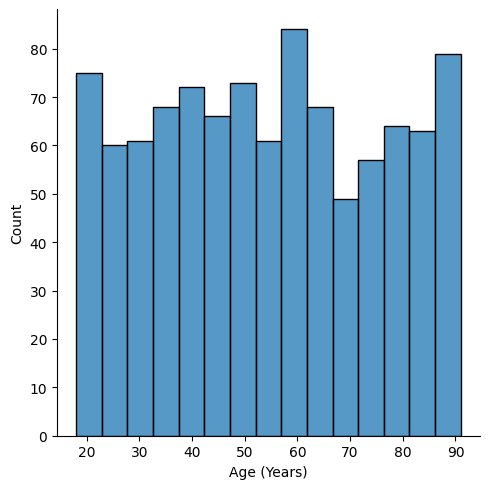

In [12]:
# Step-2

## 2(a)Calculating total number of bins required for bin_width of 5
## Below code is written based on this formula to calculate number of bins based on number of bin width given.
    # Bin width = Spec Tolerance or Range ÷ number of bins
    # Spec Tolerance = USL-LSL
    # Range = Max - Min
    # If we use the range for this example:
    # Bin width = (Max-Min) ÷ Number of bins
    
difference= int((user_data["Age (Years)"].max()- user_data["Age (Years)"].min()))
num_bins= round(difference/5)                                         # Calculating number of bins
age_plt= sns.displot(data=user_data, x= "Age (Years)", bins=num_bins)      # Creating displot with seaborn 
print("Number of bins required :",num_bins)                           # Printing number of bins required

### Task - 2(b) Performing univariate plot of the following data attribute
(b) Fixing data errors from Dependents column

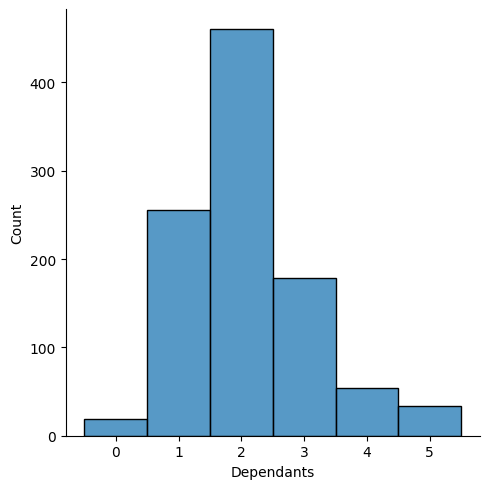

In [13]:
## 2(b)Fixing data errors from Dependents column

dependents= user_data["Dependants"]

## Fixing the data errors by replacing " " with "0"
user_data['Dependants'] = user_data['Dependants'].fillna("0")

## Creating displot with seaborn
dependents_plt= sns.displot(data=user_data, x= "Dependants",bins=(0,1,2,3,4,5))

### Task - 2(c) Performing univariate plot of the following data attribute
(c) Creating displot with seaborn, conditioned on Marital Status

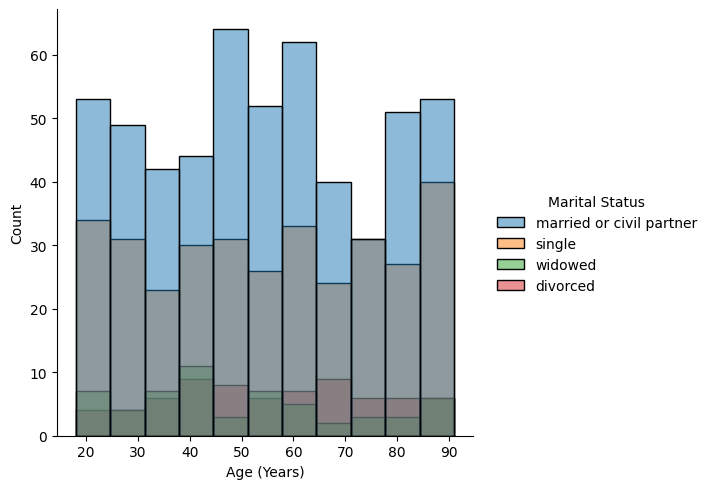

In [14]:
## 2(c) Creating displot with seaborn, conditioned on Marital Status

age_conditioned_plt=sns.displot(data=user_data, x= "Age (Years)",hue="Marital Status",bins='auto')

### Task - 3(a) Performing multivariate plot with the following data attribute
(a) Creating relplot with seaborn, Commuted distance against salary

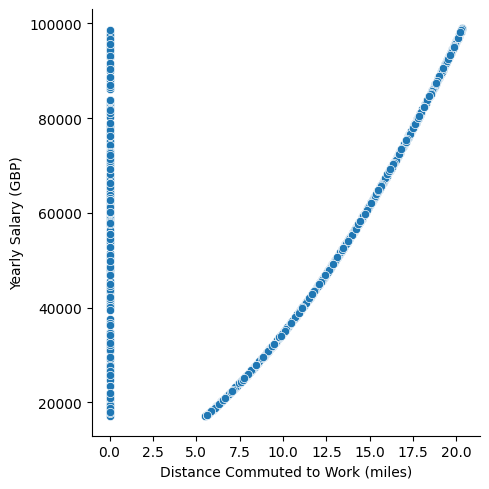

In [15]:
# Step-3

dcw_sal_plt=sns.relplot(data=user_data, x= 'Distance Commuted to Work (miles)', y='Yearly Salary (GBP)')

### Task - 3(b)  Performing multivariate plot with the following data attribute
(b) Creating relplot with seaborn for Age against Salary

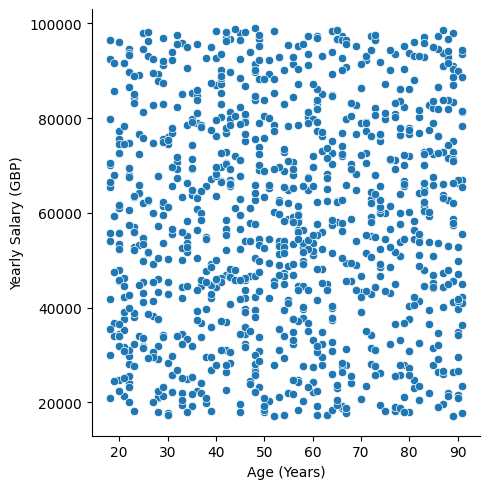

In [16]:
## 3(b) Age against Salary

age_sal_plt=sns.relplot(data=user_data,x="Age (Years)", y='Yearly Salary (GBP)')

### Task - 3(c)  Performing multivariate plot with the following data attribute
(c) Creating relplot with seaborn for Age against Salary conditioned by Dependants

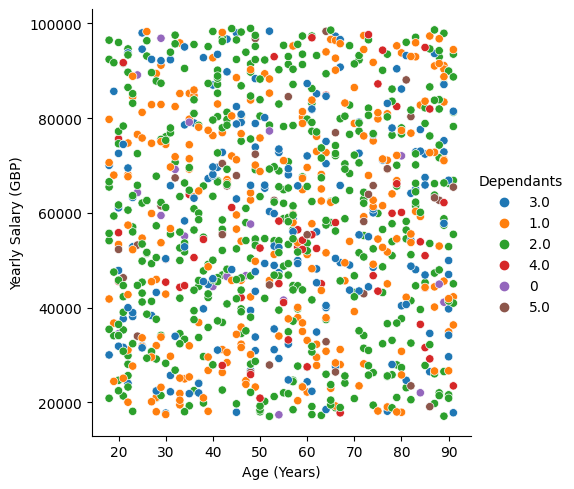

In [17]:
## 3(c) Age against Salary conditioned by Dependants

sal_dep_plt=sns.relplot(data=user_data,x="Age (Years)", y='Yearly Salary (GBP)',hue="Dependants")

### Task - 4 Saving the produced plots

In [19]:
figures_to_save={}

figures_to_save["Total number of bins required for bin_width of 5 for Age.png"]= age_plt
figures_to_save["Fixed data errors from dependent column.png"]= dependents_plt
figures_to_save["Age conditioned on Marital Status.png"]= age_conditioned_plt
figures_to_save["Commuted distance against salary.png"]= dcw_sal_plt
figures_to_save["Age against salary.png"]=age_sal_plt
figures_to_save["Age against salary conditioned by dependents.png"]=sal_dep_plt

for k,v in figures_to_save.items():
    v.savefig(f"G:/Programming Workshops/Understanding of AI Graded Assignment/Customer_Data_Preprocessing_Graded Assignment - Submission File/{k}")